# Customer churn 

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [14]:
df=pd.read_csv('custumer_churn.csv')

In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As we can see only 3 columns are representing the statistical data as rest of the columns are in object type thus need to convert it into numerical values.

# Data Preprocessing

In [23]:
#Converting categorical values into numerical values
#As there are many columns taking values more than 2(yes or no) thus we need to use Label Encoder to convert them into strings

In [26]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=Le.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


Here we can see that all columns values converted to numerical.

# EDA

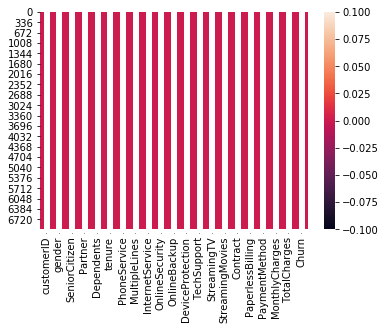

In [21]:
#let us check whether the null values are present in the datasets or not using heatmap
sns.heatmap(df.isnull(),annot=True)
plt.show()

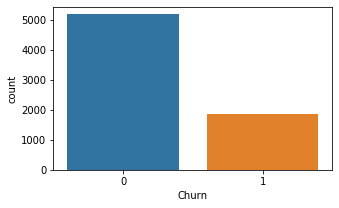

In [28]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=df['Churn'],linewidth=1)
plt.show()

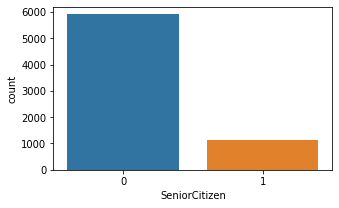

In [29]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=df['SeniorCitizen'],linewidth=1)
plt.show()

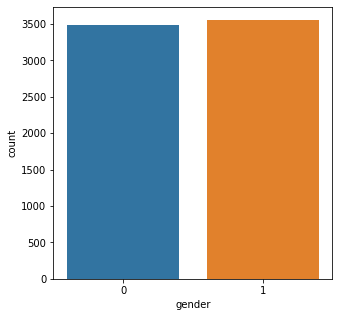

In [30]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['gender'],linewidth=1)
plt.show()

0    3641
1    3402
Name: Partner, dtype: int64


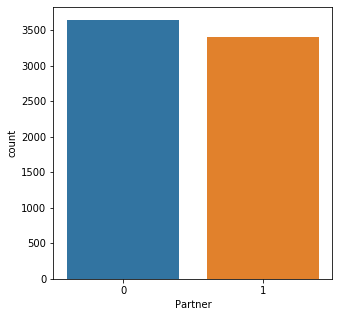

In [31]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Partner'],linewidth=1)
print(df['Partner'].value_counts())

0    4933
1    2110
Name: Dependents, dtype: int64


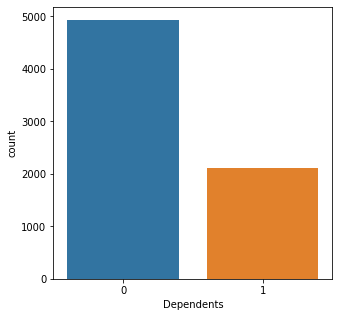

In [32]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Dependents'],linewidth=1)
print(df['Dependents'].value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


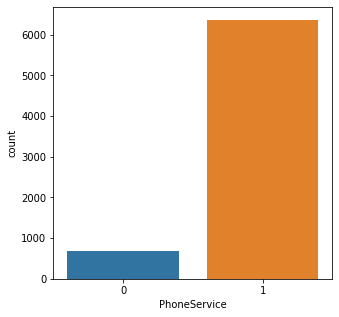

In [33]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['PhoneService'],linewidth=1)
print(df['PhoneService'].value_counts())

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64


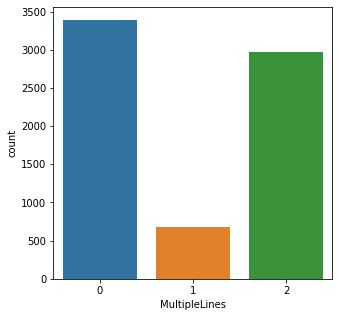

In [34]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['MultipleLines'],linewidth=1)
print(df['MultipleLines'].value_counts())

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64


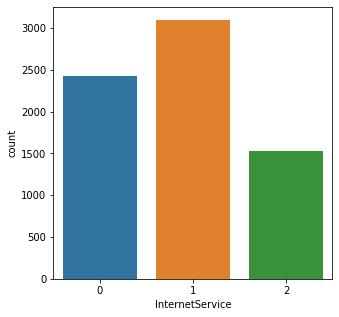

In [35]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['InternetService'],linewidth=1)
print(df['InternetService'].value_counts())

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64


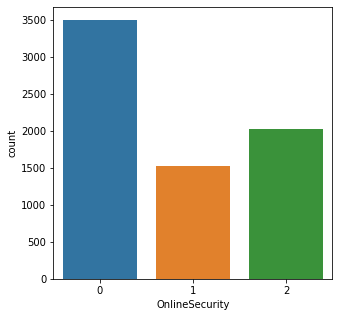

In [36]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['OnlineSecurity'],linewidth=1)
print(df['OnlineSecurity'].value_counts())

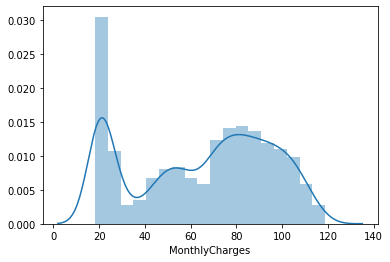

In [37]:
sns.distplot(df['MonthlyCharges'],kde=True)

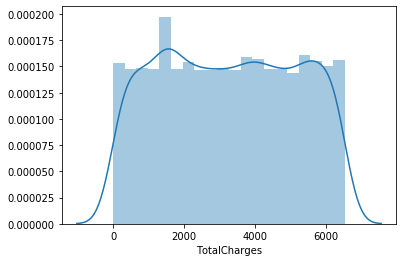

In [38]:
sns.distplot(df['TotalCharges'],kde=True)

From above graphs we can analyse the distribution and as somw part of data going out from the normal distribution thus it shows that there are some outliers present.

In [39]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Here we can see the complete statistical summary of all the columns. Here we can see the mean, max, min values of complete dataset

Checking Correlation with target variables

In [40]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


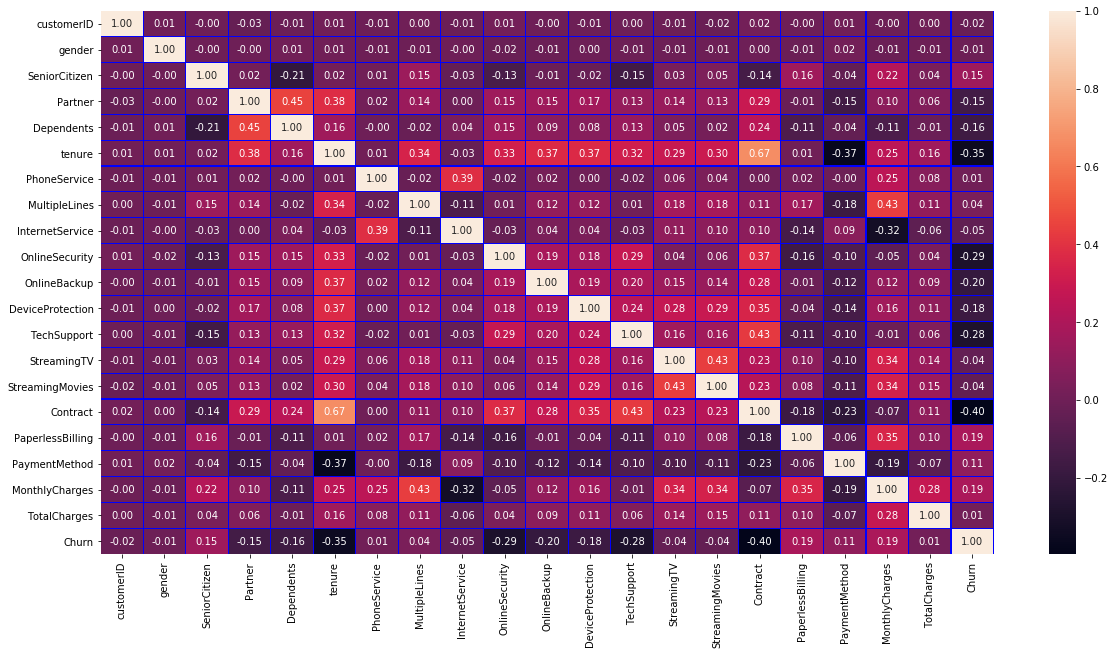

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=.1,linecolor='blue',fmt='.2f')

From above heatmap graph we can analyse that target variable 'Churn' are not much positively correlated.showing high positive correlation with 'Monthlycharges' and 'paperlessbilling' mostly are negatively correlated as shown in graph.

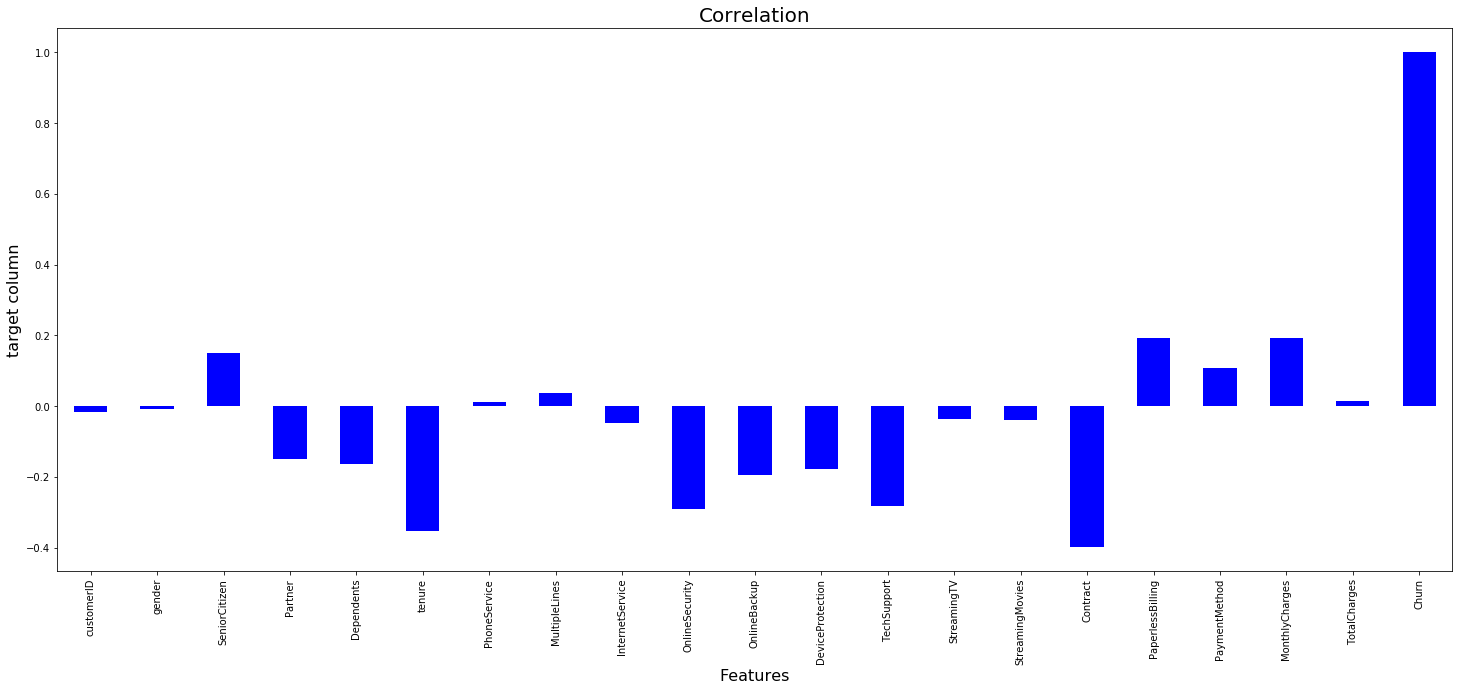

In [46]:
plt.figure(figsize=(25,10))
df.corr()['Churn'].plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=16)
plt.ylabel('target column',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

Checking the Skewness of Dataset

In [47]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Checking Outliers

In [48]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [49]:
#Boxplot graph to check outliers.

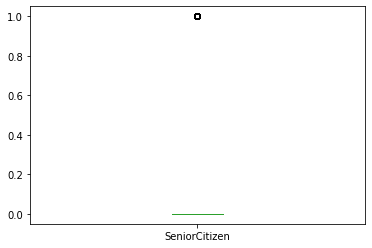

In [50]:
df['SeniorCitizen'].plot.box()

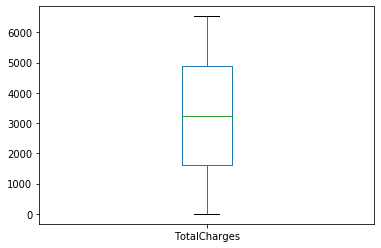

In [51]:
df['TotalCharges'].plot.box()

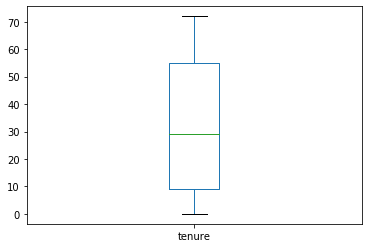

In [52]:
df['tenure'].plot.box()

Spilitting in X and Y

In [53]:
x=df.drop("Churn",axis=1)
y=df['Churn']

# Scaling the data using MinMax Scaler

In [54]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test)*100,2)

The accuracy of the Logistic Regression is 79.60246095598676 2


In [58]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation score of Logistic Regression model :",scr.mean()*100,2)

cross validation score of Logistic Regression model : 79.52574561262017 2


Thus our predictions are almost 80% accurate, i.e. for our logistic regression model. and the Cross Validation score is 80%

# Random Forest Classifier

In [59]:
rfc = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [60]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [61]:
predrfc=rfc.predict(x_test)

In [62]:
print('The accuracy of the Randonforestclassifier is',metrics.accuracy_score(predrfc,y_test)*100,2)

The accuracy of the Randonforestclassifier is 79.83909133932798 2


In [63]:
#cross validation for Random Forest Classifier

In [64]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfc,x,y,cv=5)

In [65]:
print("cross validation score of RandomForestClassifier model :",scr.mean()*100,2)

cross validation score of RandomForestClassifier model : 79.82410155493903 2


Thuss our predictionss for RandomForestClassifier are almost 80% accurate, i.e. for our RandomForestClassifier model  and the Cross Validation score is 80%

# Decision Tree Classifier

In [66]:
dtc= DecisionTreeClassifier(random_state=1)

In [67]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [68]:
preddtc = dtc.predict(x_test)

In [69]:
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(preddtc,y_test)*100,2)

The accuracy of the Decision Tree Classifier is 73.78135352579271 2


In [70]:
#cross validation for DecisionTreeClassifier

In [71]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x,y,cv=5)

In [72]:
print("cross validation score of RandomForestClassifier model :",scr.mean()*100,2)

cross validation score of RandomForestClassifier model : 72.55423737015292 2


Thus our predictions for DecisionTreeClassifier are almost 74% accurate, i.e. for our DecisionTreeClassifier model. and the Cross Validation score is 73%

# KNN

In [73]:
KNN = KNeighborsClassifier(n_neighbors = 3) 
KNN.fit(x_train, y_train)  
y_pred = KNN.predict(x_test)  
print('The accuracy of the KNeighborsClassifier is', round(KNN.score(x_train, y_train) * 100, 2))

The accuracy of the KNeighborsClassifier is 82.27


In [74]:
#cross validation for KNeighborsClassifier

In [75]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(KNN,x,y,cv=5)

In [76]:
print("cross validation score of KNeighborsClassifier model :",scr.mean()*100,2)

cross validation score of KNeighborsClassifier model : 67.08775566165559 2


Thus our predictions for KNeighborsClassifier are almost 83% accurate, i.e. for our KNeighborsClassifier model. and the Cross Validation score is 67%

# Support Vector Machine

In [77]:
from sklearn.svm import SVC

In [78]:
svm=SVC(kernel='rbf',probability=True)

In [79]:
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [80]:
y_pred = svm.predict(x_test)  
print('The accuracy of the Support Vector Machine is', round(svm.score(x_train, y_train) * 100, 2))

The accuracy of the Support Vector Machine is 73.73


In [81]:
#cross validation for Support Vector Machine

In [82]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svm,x,y,cv=5)

In [83]:
print("cross validation score of Support Vector Machine model :",scr.mean()* 100, 2)

cross validation score of Support Vector Machine model : 73.46301575908123 2


Thus our predictions for Support Vector Machine are almost 74% accurate, i.e. for our Support Vector Machine model. and the Cross Validation score is 74%

Observation: We can see that from all performed models the best accuracy model considered is Logistic Regression and RandomForestClassifier as these are with no or least difference between accuracy and cross validation score; so hyper tuning will be performed on one of these.

# Hyper Parameter Tuning¶

In [84]:
#Performing GridSearchCV using Logistic Regression

In [85]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [87]:
lr_cv=GridSearchCV(lr,grid,cv=10)

In [88]:
lr_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7959432048681541


Thus our predictions are almost 80% accurate with Logistic Regression, i.e. we have identified 80% of the churn analysis prediction correctly for our Logistic Regression with grid search.

In [89]:
import joblib

In [90]:
joblib.dump(lr_cv.best_estimator_,"Telecom_customer_churnModel.obj")

['Telecom_customer_churnModel.obj']